# Mohammad Avesh Husain

# Prediction using Decision Tree Algorithm



# Aim:- Create the Decision Tree classifier and visualize it graphically.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics # evaluation purpose
from sklearn.tree import DecisionTreeClassifier # model 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV,train_test_split
import graphviz #visualize tree
from sklearn import tree 
import pickle


In [2]:
#importing data
iris_data = pd.read_csv('Iris.csv')


In [3]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#changing the column name for easy typing
mapper = {'SepalLengthCm':'sepal_length','SepalWidthCm':'sepal_width',\
          'PetalLengthCm':'petal_length','PetalWidthCm':'petal_width'}
iris_data.rename(mapper,axis=1,inplace=True)

In [5]:
iris_data.head()

,Id,sepal_length,sepal_width,petal_length,petal_width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris_data.shape

(150, 6)

In [7]:
# we have every record and their data type is also matching
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
# encoding the target variable
encoder = LabelEncoder()
iris_data['Species'] = encoder.fit_transform( iris_data['Species'])

k =iris_data.iloc[:,-1]


In [9]:
iris_data['Species'].unique()

array([0, 1, 2])

In [10]:
iris_data.drop('Id',axis=1,inplace=True)

In [11]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<AxesSubplot:>

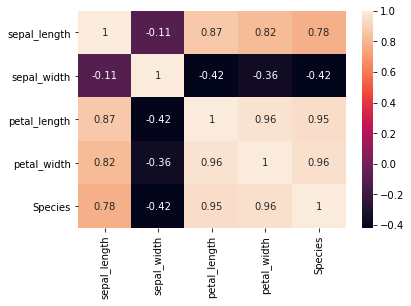

In [13]:
# all the features are related to each other
sns.heatmap(iris_data.corr(),annot=True)

In [281]:
# Prepairing data
X = iris_data.iloc[:,:-1].values
y = iris_data.iloc[:,-1].values
X,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [282]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [283]:
X_train,y_train

(array([[6. , 2.9, 4.5, 1.5],
        [5.1, 3.5, 1.4, 0.3],
        [6.7, 3. , 5. , 1.7],
        [5.8, 2.6, 4. , 1.2],
        [6.3, 2.8, 5.1, 1.5],
        [5.7, 2.5, 5. , 2. ],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3. , 4.5, 1.5],
        [5.5, 2.3, 4. , 1.3],
        [6.6, 2.9, 4.6, 1.3],
        [5.7, 3. , 4.2, 1.2],
        [4.6, 3.6, 1. , 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.4, 1.7, 0.2],
        [5.6, 2.5, 3.9, 1.1],
        [6.9, 3.1, 5.1, 2.3],
        [5.6, 3. , 4.1, 1.3],
        [4.9, 3.1, 1.5, 0.1],
        [5. , 3.5, 1.3, 0.3],
        [5. , 3. , 1.6, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.3, 3. , 1.1, 0.1],
        [5.4, 3.9, 1.3, 0.4],
        [5.5, 2.6, 4.4, 1.2],
        [6.1, 2.6, 5.6, 1.4],
        [6.8, 2.8, 4.8, 1.4],
        [7.2, 3.2, 6. , 1.8],
        [5.7, 2.6, 3.5, 1. ],
        [7.1, 3. , 5.9, 2.1],
        [5.6, 2.7, 4.2, 1.3],
        [5.9, 3. , 4.2, 1.5],
        [7. , 3.2, 4.7, 1.4],
        [5. , 3.5, 1.6, 0.6],
        [6

In [284]:
#instantiating a decition tree classifier
tree_model = DecisionTreeClassifier()

In [301]:
#Tuning Hyper parameter [max depth]
depth = {'max_depth':[1,2,3,4,5,10,15,20,25,30,35,40,50],'criterion':['gini','entropy']}

In [302]:
#instantiating GridSearchCV
grid  = GridSearchCV(tree_model,depth)

In [303]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35,
                                       40, 50]})

In [304]:
#getting the best parameter
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [308]:
# changing depth of our model
tree_model.max_depth = 3
tree_model.criterion = 'entropy'
tree_model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [309]:
# now fitting the model
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

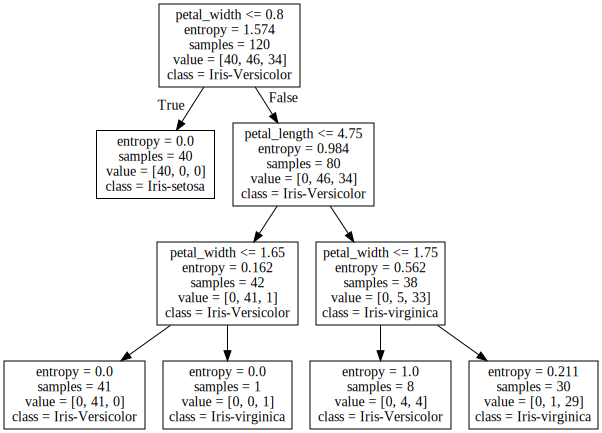

In [310]:
# visualizing the graph
# visualizing tree
dot_data = tree.export_graphviz(tree_model,feature_names=iris_data.iloc[:,:-1].columns\
                                ,class_names=['Iris-setosa','Iris-Versicolor','Iris-virginica'])

graph = graphviz.Source(dot_data, format="png") 
graph

In [311]:
# predicting on test data
y_predict  = tree_model.predict(X_test)
y_predict

array([2, 2, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 1, 2, 0, 2, 2, 0, 2])

## Evaluating the model

In [312]:
tree_model.score(X_test,y_test)

1.0

In [313]:
metrics.accuracy_score(y_test,y_predict)

1.0

In [314]:
## Looks like we have made a perfect classifier
compare  =pd.DataFrame({'actual_value':y_test,'predicted_value':y_predict})
compare


,actual_value,predicted_value
0,2,2
1,2,2
2,1,1
3,1,1
4,2,2
5,0,0
6,0,0
7,1,1
8,0,0
9,2,2


<AxesSubplot:xlabel='predicted_value', ylabel='count'>

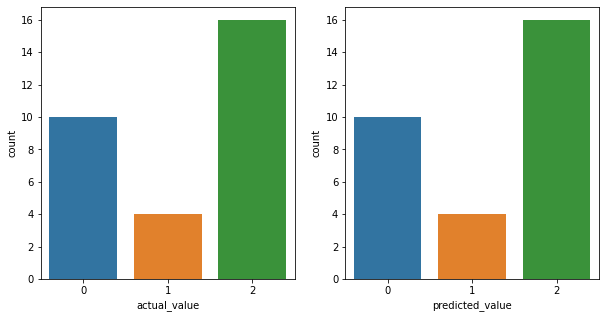

In [331]:
fig, axes = plt.subplots(1, 2,  sharex=True, figsize=(10,5))

sns.countplot(x=compare['actual_value'],ax=axes[0],)
    
sns.countplot(x=compare['predicted_value'],ax=axes[1])

## Thankyou

In [333]:
pickle.dump(tree_model,open('tree_model.pkl','wb'))